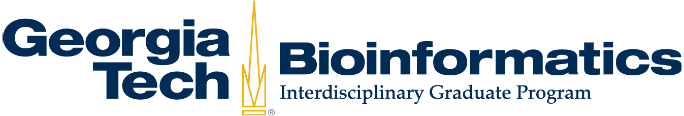

## Annotating variants in a VCF files

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Downsampling 1000 Genomes VCF file**
### *50 points*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Check if you have VCF files required for today's class</h3>
    <p>We will be using Chr7 and Chr11 from 1000 genomes phase 3 for today's class</p>
</div>

In [1]:
!ls -lh ~/biol6150/Data/

total 3.6G
-rw-r--r-- 1 ssharma454 gtperson  42K Sep 22 08:45 1000GenomesMap.tsv
-rw-r-xr-x 1 ssharma454 gtperson 2.0G Sep 15 07:08 1000Genomes.Pruned.vcf
-rw-r--r-- 1 ssharma454 gtperson 736M Sep 22 06:43 phase3.chr11.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Sep 22 07:14 phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 868M Sep 22 07:04 phase3.chr7.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 146K Sep 22 07:37 phase3.chr7.GRCh38.GT.crossmap.vcf.gz.tbi


In [24]:
#Set up working directory.
!mkdir -p ~/scratch/AnnotateVariants

In [14]:
#Check if bcftools is working for you.
!bcftools


Program: bcftools (Tools for variant calling and manipulating VCFs and BCFs)
License: GNU GPLv3+, due to use of the GNU Scientific Library
Version: 1.17 (using htslib 1.18)

Usage:   bcftools [--version|--version-only] [--help] <command> <argument>

Commands:

 -- Indexing
    index        index VCF/BCF files

 -- VCF/BCF manipulation
    annotate     annotate and edit VCF/BCF files
    concat       concatenate VCF/BCF files from the same set of samples
    convert      convert VCF/BCF files to different formats and back
    head         view VCF/BCF file headers
    isec         intersections of VCF/BCF files
    merge        merge VCF/BCF files files from non-overlapping sample sets
    norm         left-align and normalize indels
    plugin       user-defined plugins
    query        transform VCF/BCF into user-defined formats
    reheader     modify VCF/BCF header, change sample names
    sort         sort VCF/BCF file
    view         VCF/BCF conversion, view, subset and filter V

<div class="alert alert-block alert-warning">
    <h3>1.2 Sickle cell disease and carriers</h3>
    <p>Red blood cell disorder that affect hemoglobin, the protein that carries oxygen through the body</p>
    <p>The HBB gene provides instructions for making a protein called beta-globin. Beta-globin is a component (subunit) of a larger protein called hemoglobin, which is located inside red blood cells.</p>
</div>

In [15]:
#Extract HBB gene
!bcftools view -r 11:5225464-5227071 -Ov -o ~/biol6150/Data/1000Genomes.Chr11.HBB.vcf ~/biol6150/Data/phase3.chr11.GRCh38.GT.crossmap.vcf.gz

[E::idx_find_and_load] Could not retrieve index file for '/home/hice1/ssharma454/biol6150/Data/phase3.chr11.GRCh38.GT.crossmap.vcf.gz'
Failed to read from /home/hice1/ssharma454/biol6150/Data/phase3.chr11.GRCh38.GT.crossmap.vcf.gz: could not load index


<div class="alert alert-block alert-warning">
    <h3>1.3 Tools need certain files to run</h3>
    <p>bcftool needs an index file to work (one of the reasons why it's fast)</p>
</div>

In [25]:
#I used Tabix to create the index file.

In [26]:
#Extract HBB gene
!bcftools view -r chr11:5225464-5227071 -Ov -o ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.vcf ~/biol6150/Data/phase3.chr11.GRCh38.GT.crossmap.vcf.gz
    

In [27]:
#Check the file.
!ls -lh ~/scratch/AnnotateVariants/

total 1.1M
-rw-r--r-- 1 ssharma454 gtperson 1.1M Sep 22 07:34 1000Genomes.Chr11.HBB.vcf


In [28]:
#Check the file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.vcf | grep -v "##" | head | cut -f1-5,11-12

#CHROM	POS	ID	REF	ALT	HG00097	HG00099
chr11	5225469	rs528009939	A	T	0|0	0|0
chr11	5225488	rs33978907	A	G	0|0	0|0
chr11	5225502	rs34029390	A	G	0|0	0|0
chr11	5225542	rs537944366	T	C	0|0	0|0
chr11	5225564	rs200399660	C	T	0|0	0|0
chr11	5225610	rs36020563	G	A	0|0	0|0
chr11	5225640	rs113082294	C	G	0|0	0|0
chr11	5225653	rs111645889	G	A	0|0	0|0
chr11	5225660	rs33971634	G	A	0|0	0|0
grep: write error
cat: write error: Broken pipe


<div class="alert alert-block alert-warning">
    <h3>1.4 Cystic fibrosis</h3>
    <p>Cystic fibrosis (CF) is a genetic (inherited) disease that causes sticky, thick mucus to build up in organs, including the lungs and the pancreas.</p>
    <p>The CFTR gene provides instructions for the CFTR protein.</p>
</div>

In [30]:
#Extract CFTR gene
!bcftools view -r chr7:117480025-117668665 -Ov -o ~/scratch/AnnotateVariants/1000Genomes.Chr7.CFTR.vcf ~/biol6150/Data/phase3.chr7.GRCh38.GT.crossmap.vcf.gz


In [31]:
#Check the file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr7.CFTR.vcf | grep -v "##" | head | cut -f1-5,11-12

#CHROM	POS	ID	REF	ALT	HG00097	HG00099
chr7	117480087	rs1800501	G	C	0|0	0|0
chr7	117480168	rs189595246	G	A	0|0	0|0
chr7	117480203	rs140393487	C	T	0|0	0|0
chr7	117480223	rs547598177	G	A	0|0	0|0
chr7	117480269	rs565917477	T	C	0|0	0|0
chr7	117480325	rs181910285	T	C	0|0	0|0
chr7	117480359	rs558023958	C	T	0|0	0|0
chr7	117480366	rs576637021	T	C	0|0	0|0
chr7	117480471	rs78171410	A	G	0|0	0|0
grep: write error
cat: write error: Broken pipe


In [5]:
!ls ~/scratch/AnnotateVariants

1000Genomes.Chr11.HBB.Annotated.vcf   1000Genomes.SickleCellCarrierInfo.txt
1000Genomes.Chr11.HBB.vcf	      1000Genomes.SickleCellCarriers.txt
1000Genomes.Chr7.CFTR.Annotated.vcf   snpEff_genes.txt
1000Genomes.Chr7.CFTR.vcf	      snpEff_summary.html
1000Genomes.SickleCellCarrierIDs.txt


## **2. Annotating a VCF file**
### *150 points*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Check if you can use snpEff</h3>
    <p>We will be using snpEff for variant annotation and effect prediction. VEP <i>https://useast.ensembl.org/info/docs/tools/vep/index.html</i> is another popular choice for similar tasks and provides a command line (not an easy install) and web based interface</p>
</div>

### Check documentation for snpEff here: http://pcingola.github.io/SnpEff/snpeff/introduction/

In [6]:
!snpEff

SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
Usage: snpEff [command] [options] [files]

Run 'java -jar snpEff.jar command' for help on each specific command

Available commands: 
	[eff|ann]                    : Annotate variants / calculate effects (you can use either 'ann' or 'eff', they mean the same). Default: ann (no command or 'ann').
	build                        : Build a SnpEff database.
	buildNextProt                : Build a SnpEff for NextProt (using NextProt's XML files).
	cds                          : Compare CDS sequences calculated form a SnpEff database to the one in a FASTA file. Used for checking databases correctness.
	closest                      : Annotate the closest genomic region.
	count                        : Count how many intervals (from a BAM, BED or VCF file) overlap with each genomic interval.
	databases                    : Show currently available databases (from local config file).
	download                     : Download a

<div class="alert alert-block alert-warning">
    <h3>2.2 Check for dependencies</h3>
    <p>Think about what an annotation tools would most likely need in order to predict the effect of a variant?</p>
</div>

In [9]:
#Check for avialable databses
!snpEff databases | grep "GRCh38" 

GRCh38.105                                                  	Homo_sapiens                                                	OK        	                              	[https://snpeff.blob.core.windows.net/databases/v5_1/snpEff_v5_1_GRCh38.105.zip, https://snpeff.blob.core.windows.net/databases/v5_0/snpEff_v5_0_GRCh38.105.zip]
GRCh38.86                                                   	GRCh38.86                                                   	          	                              	[https://snpeff.blob.core.windows.net/databases/v5_1/snpEff_v5_1_GRCh38.86.zip, https://snpeff.blob.core.windows.net/databases/v5_0/snpEff_v5_0_GRCh38.86.zip]
GRCh38.99                                                   	Homo_sapiens                                                	          	                              	[https://snpeff.blob.core.windows.net/databases/v5_1/snpEff_v5_1_GRCh38.99.zip, https://snpeff.blob.core.windows.net/databases/v5_0/snpEff_v5_0_GRCh38.99.zip]
GRCh38.mane.0.95.ensembl     

<div class="alert alert-block alert-warning">
    <h3>2.3 GRCh38.105 is already installed on your systems</h3>
    <p>Depending on what species, research, or project you're working on, new databases might have to be downloaded.</p>
</div>

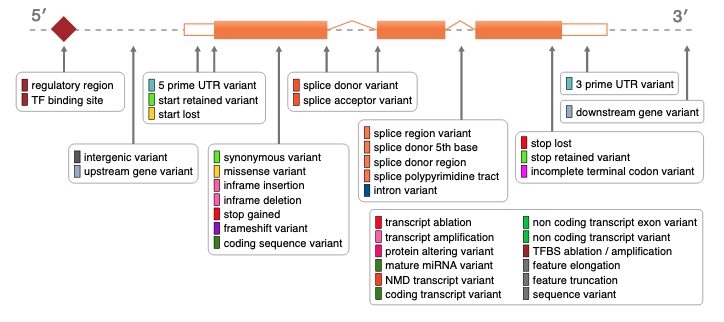

<div class="alert alert-block alert-warning">
    <h3>2.4 Annotate the HBB gene VCF</h3>
    <p>We will use snpEff to annotate the variants</p>
</div>

In [35]:
#Run the snpEff commamd as recommended by the documentation page.

!snpEff ann GRCh38.105 ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.vcf > ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.Annotated.vcf

<div class="alert alert-block alert-danger">
    <h3>2.5 This will likely fail!</h3>
    <p>Often times (specially with Java), tools will fail unexpectedly because of restricted RAM usage. You have to make sure of two main things:</p>
    <p><b>1.</b> Have you told the tool to use more memory? Does the tool have a default?</p>
    <p><b>2.</b> Does your system (PACE-ICE) have a hard cap on memory utilization?</p>
</div>

In [1]:
#Run the snpEff commamd again

!snpEff -Xmx16g ann -v GRCh38.105 ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.vcf > ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.Annotated.vcf



00:00:00 SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
00:00:00 Command: 'ann'
00:00:00 Reading configuration file 'snpEff.config'. Genome: 'GRCh38.105'
00:00:00 Reading config file: /home/hice1/ssharma454/notebooks/snpEff.config
00:00:00 Reading config file: /storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/snpEff.config
00:00:01 done
00:00:01 Reading database for genome version 'GRCh38.105' from file '/storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/./data/GRCh38.105/snpEffectPredictor.bin' (this might take a while)
00:00:29 done
00:00:29 Loading Motifs and PWMs
00:00:29 Building interval forest
00:00:41 done.
00:00:41 Genome stats :
#-----------------------------------------------
# Genome name                : 'Homo_sapiens'
# Genome version             : 'GRCh38.105'
# Genome ID                  : 'GRCh38.105[0]'
# Has protein coding info    : true
# Has Tr. Support Level info : true
# Genes              

00:00:47 Predicting variants

WARNINGS: Some warning were detected
Warning type	Number of warnings
WARNING_TRANSCRIPT_INCOMPLETE	69


00:00:48 Creating summary file: snpEff_summary.html
00:00:49 Creating genes file: snpEff_genes.txt
00:00:49 done.
00:00:49 Logging
00:00:50 Checking for updates...
00:00:51 Done.


In [6]:
#Check the output file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.Annotated.vcf | grep "rs334"

chr11	5227002	rs334	T	A	100.0	PASS	AC=137;AF=0.0273562;AN=5008;NS=2504;DP=22876;EAS_AF=0;AMR_AF=0.0072;AFR_AF=0.0998;EUR_AF=0;SAS_AF=0;AA=T|||;VT=SNP;EX_TARGET;ANN=A|missense_variant|MODERATE|HBB|ENSG00000244734|transcript|ENST00000335295.4|protein_coding|1/3|c.20A>T|p.Glu7Val|70/628|20/444|7/147||,A|missense_variant|MODERATE|HBB|ENSG00000244734|transcript|ENST00000485743.1|protein_coding|1/2|c.20A>T|p.Glu7Val|71/680|20/336|7/111||,A|missense_variant|MODERATE|HBB|ENSG00000244734|transcript|ENST00000380315.2|protein_coding|3/4|c.20A>T|p.Glu7Val|250/502|20/272|7/89||WARNING_TRANSCRIPT_INCOMPLETE,A|missense_variant|MODERATE|HBB|ENSG00000244734|transcript|ENST00000647020.1|protein_coding|1/3|c.20A>T|p.Glu7Val|196/754|20/444|7/147||,A|upstream_gene_variant|MODIFIER|HBB|ENSG00000244734|transcript|ENST00000475226.1|retained_intron||n.-179A>T|||||179|,A|upstream_gene_variant|MODIFIER|ENSG00000221031|ENSG00000221031|transcript|ENST00000408104.1|ribozyme||n.-2363A>T|||||2363|,A|upstream_gene_var

<div class="alert alert-block alert-warning">
    <h3>2.4 Annotate the CFTR gene VCF now</h3>
    <p>We will use snpEff to annotate the variants</p>
</div>

In [8]:
#Run the snpEff commamd again

!snpEff -Xmx16g ann -v GRCh38.105 ~/scratch/AnnotateVariants/1000Genomes.Chr7.CFTR.vcf > ~/scratch/AnnotateVariants/1000Genomes.Chr7.CFTR.Annotated.vcf



00:00:00 SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
00:00:00 Command: 'ann'
00:00:00 Reading configuration file 'snpEff.config'. Genome: 'GRCh38.105'
00:00:00 Reading config file: /home/hice1/ssharma454/notebooks/snpEff.config
00:00:00 Reading config file: /storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/snpEff.config
00:00:01 done
00:00:01 Reading database for genome version 'GRCh38.105' from file '/storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/./data/GRCh38.105/snpEffectPredictor.bin' (this might take a while)
00:00:29 done
00:00:29 Loading Motifs and PWMs
00:00:29 Building interval forest
00:00:41 done.
00:00:41 Genome stats :
#-----------------------------------------------
# Genome name                : 'Homo_sapiens'
# Genome version             : 'GRCh38.105'
# Genome ID                  : 'GRCh38.105[0]'
# Has protein coding info    : true
# Has Tr. Support Level info : true
# Genes              

#		'HSCHR19KIR_CA04_CTG3_1'	58537114	Standard
#		'HSCHR19LRC_PGF2_CTG3_1'	58355410	Standard
#		'HSCHR19LRC_COX2_CTG3_1'	58288451	Standard
#		'HG2062_PATCH'	57262172	Standard
#		'Y'	57227415	Standard
#		'HG1535_PATCH'	57187419	Standard
#		'HG1531_PATCH'	57177176	Standard
#		'HG1485_PATCH'	50915261	Standard
#		'HSCHR22_1_CTG7'	50872732	Standard
#		'HSCHR22_7_CTG1'	50845852	Standard
#		'HSCHR22_1_CTG6'	50842710	Standard
#		'HSCHR22_5_CTG1'	50832153	Standard
#		'HSCHR22_8_CTG1'	50832130	Standard
#		'HSCHR22_2_CTG1'	50830603	Standard
#		'HSCHR22_1_CTG3'	50827573	Standard
#		'HSCHR22_1_CTG4'	50824699	Standard
#		'HSCHR22_1_CTG5'	50821308	Standard
#		'HG1311_PATCH'	50818486	Standard
#		'HG494_PATCH'	50818473	Standard
#		'22'	50818468	Standard
#		'HSCHR22_3_CTG1'	50818468	Standard
#		'HG2512_PATCH'	50818467	Standard
#		'HSCHR22_6_CTG1'	50815919	Standard
#		'HSCHR22_1_CTG1'	50806372	Standard
#		'HSCHR22_4_CTG1'	50806321	Standard
#		'HSCHR22_1_CTG2'	50788525	Standard
#		'HG2513_PATCH'	47068079	S

In [9]:
#Check the output file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr7.CFTR.Annotated.vcf | grep "rs213950"

chr7	117559479	rs213950	G	A	100.0	PASS	AC=2915;AF=0.582069;AN=5008;NS=2504;DP=17643;EAS_AF=0.3869;AMR_AF=0.513;AFR_AF=0.9349;EUR_AF=0.4384;SAS_AF=0.5031;AA=A|||;VT=SNP;EX_TARGET;ANN=A|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000003084.11|protein_coding|11/27|c.1408G>A|p.Val470Met|1478/6070|1408/4443|470/1480||,A|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000426809.5|protein_coding|10/26|c.1318G>A|p.Val440Met|1318/4316|1318/4316|440/1437||WARNING_TRANSCRIPT_INCOMPLETE,A|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000648260.1|protein_coding|10/17|c.1225G>A|p.Val409Met|1309/2723|1225/2529|409/842||,A|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000649406.1|protein_coding|10/21|c.1225G>A|p.Val409Met|1309/3758|1225/3564|409/1187||,A|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000649781.1|protein_coding|10/26|c.1225G>A|p.Val409Met|1225/4260|1225/4260|409/1419||,A|3_prime_UTR_variant|MODIFIE

In [10]:
#Check the output file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr7.CFTR.Annotated.vcf | grep "rs74571530"


chr7	117559594	rs74571530	T	G	100.0	PASS	AC=3;AF=0.000599042;AN=5008;NS=2504;DP=17940;EAS_AF=0;AMR_AF=0;AFR_AF=0;EUR_AF=0.003;SAS_AF=0;AA=T|||;VT=SNP;EX_TARGET;ANN=G|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000003084.11|protein_coding|11/27|c.1523T>G|p.Phe508Cys|1593/6070|1523/4443|508/1480||,G|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000426809.5|protein_coding|10/26|c.1433T>G|p.Phe478Cys|1433/4316|1433/4316|478/1437||WARNING_TRANSCRIPT_INCOMPLETE,G|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000648260.1|protein_coding|10/17|c.1340T>G|p.Phe447Cys|1424/2723|1340/2529|447/842||,G|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000649406.1|protein_coding|10/21|c.1340T>G|p.Phe447Cys|1424/3758|1340/3564|447/1187||,G|missense_variant|MODERATE|CFTR|ENSG00000001626|transcript|ENST00000649781.1|protein_coding|10/26|c.1340T>G|p.Phe447Cys|1340/4260|1340/4260|447/1419||,G|3_prime_UTR_variant|MODIFIER|CFTR|ENSG0000000

<div class="alert alert-block alert-warning">
    <h3>2.5 Look at which individuals carry the rs334 (sickle cell variant)</h3>
    <p>Let's try writing a query using bcftools</p>
</div>

In [26]:
#Query command using bcftools.

!bcftools query -f'[%CHROM:%POS %SAMPLE %GT\n]' -i 'ID=="rs334" && GT="alt"' ~/scratch/AnnotateVariants/1000Genomes.Chr11.HBB.Annotated.vcf > ~/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierInfo.txt


In [11]:
#Check the output.
!wc ~/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierInfo.txt
!cat ~/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierInfo.txt 


 137  411 3562 /home/hice1/ssharma454/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierInfo.txt
chr11:5227002 HG00640 0|1
chr11:5227002 HG01052 0|1
chr11:5227002 HG01108 0|1
chr11:5227002 HG01140 0|1
chr11:5227002 HG01485 0|1
chr11:5227002 HG01889 0|1
chr11:5227002 HG01896 0|1
chr11:5227002 HG02108 0|1
chr11:5227002 HG02111 0|1
chr11:5227002 HG02332 0|1
chr11:5227002 HG02502 1|0
chr11:5227002 HG02511 0|1
chr11:5227002 HG02536 0|1
chr11:5227002 HG02546 0|1
chr11:5227002 HG02594 0|1
chr11:5227002 HG02613 1|0
chr11:5227002 HG02620 1|0
chr11:5227002 HG02642 1|0
chr11:5227002 HG02666 0|1
chr11:5227002 HG02679 1|0
chr11:5227002 HG02715 1|0
chr11:5227002 HG02722 1|0
chr11:5227002 HG02759 0|1
chr11:5227002 HG02763 1|0
chr11:5227002 HG02798 0|1
chr11:5227002 HG02799 0|1
chr11:5227002 HG02810 0|1
chr11:5227002 HG02816 0|1
chr11:5227002 HG02817 1|0
chr11:5227002 HG02836 1|0
chr11:5227002 HG02839 0|1
chr11:5227002 HG02840 1|0
chr11:5227002 HG02852 0|1
chr11:5227002 HG02870 1|0
chr11:5227002 H

In [31]:
#Get the IDs of sickle cell carriers.
!cut -f2 -d " " ~/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierInfo.txt > ~/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierIDs.txt 
!head ~/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierIDs.txt



HG00640
HG01052
HG01108
HG01140
HG01485
HG01889
HG01896
HG02108
HG02111
HG02332


In [34]:
#Look up the sample IDs which carry the sickle cell variant, and what region of the world they come from.
!grep -F -f ~/scratch/AnnotateVariants/1000Genomes.SickleCellCarrierIDs.txt ~/biol6150/Data/1000GenomesMap.tsv 

HG00640	PUR
HG01052	PUR
HG01108	PUR
HG01140	CLM
HG01485	CLM
HG01889	ACB
HG01896	ACB
HG02108	ACB
HG02111	ACB
HG02332	ACB
HG02502	ACB
HG02511	ACB
HG02536	ACB
HG02546	ACB
HG02594	GWD
HG02613	GWD
HG02620	GWD
HG02642	GWD
HG02666	GWD
HG02679	GWD
HG02715	GWD
HG02722	GWD
HG02759	GWD
HG02763	GWD
HG02798	GWD
HG02799	GWD
HG02810	GWD
HG02816	GWD
HG02817	GWD
HG02836	GWD
HG02839	GWD
HG02840	GWD
HG02852	GWD
HG02870	GWD
HG02885	GWD
HG02895	GWD
HG02896	GWD
HG02923	ESN
HG02938	ESN
HG02974	ESN
HG02983	GWD
HG03046	GWD
HG03057	MSL
HG03061	MSL
HG03069	MSL
HG03078	MSL
HG03088	MSL
HG03096	MSL
HG03097	MSL
HG03099	ESN
HG03112	ESN
HG03115	ESN
HG03117	ESN
HG03118	ESN
HG03120	ESN
HG03123	ESN
HG03130	ESN
HG03133	ESN
HG03135	ESN
HG03172	ESN
HG03189	ESN
HG03195	ESN
HG03258	GWD
HG03267	ESN
HG03271	ESN
HG03294	ESN
HG03298	ESN
HG03313	ESN
HG03366	ESN
HG03428	MSL
HG03445	MSL
HG03446	MSL
HG03458	MSL
HG03470	MSL
HG03472	MSL
HG03499	ESN
HG03518	ESN
HG03548	MSL
HG03558	MSL
HG03559	MSL
HG03563	MSL
HG03565	MSL
HG03571	MSL
HG03